<a href="https://colab.research.google.com/github/chaitanyaa1512/Amazon_Web_Scrapping_and_Data_Analysis/blob/main/Amazon_Product_Smart_Locks_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing the relevant libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

# URL of the Amazon Smart Locks Web Page
url_template = "https://www.amazon.com/s?k=smart+lock&page={page}&crid=2A0VLCNI653XM&sprefix=smart+lock%2Caps%2C2815&ref=nb_sb_ss_ts-doa-p_2_10"

# Setting up the header for initialising the HTTP request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

# Creating an empty list to store product details
products = []

#Running a loop for scraping first 20 pages
for page in range(1, 21):
    url = url_template.format(page=page)

    # HTTP request to fetch the content of the Web Page
    response = requests.get(url, headers=headers)

    # Checking if the request was successful with no Respinse 503 error
    if response.status_code == 200:
        # Parsing the content with BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Select the product listings
        product_selectors = soup.select(".s-main-slot .s-result-item")

        # Reiterate over the product listings to extract details
        for product in product_selectors:
            product_details = {}

            # Fetch the Brand Name
            title_element = product.find("span", class_="a-size-base-plus a-color-base a-text-normal")
            if title_element:
                title_text = title_element.text.strip()
                product_details["Brand Name"] = title_text.split(" ")[0]  # Take the first word as brand
            else:
                product_details["Brand Name"] = "Not Available"

            # Fetch the Product Price
            price_whole = product.find("span", class_="a-price-whole")
            price_fraction = product.find("span", class_="a-price-fraction")
            if price_whole and price_fraction:
                product_details["Price"] = f"${price_whole.text.strip()}{price_fraction.text.strip()}"
            else:
                product_details["Price"] = "Not Available"

            # fetch the Product Rating
            rating = product.find("span", class_="a-icon-alt")
            if rating:
                product_details["Rating"] = rating.text.strip()
            else:
                product_details["Rating"] = "Not Available"

            # Fetch the Rating Count(No. of Ratings)
            rating_count = product.find("span", class_="a-size-base")
            if rating_count:
                product_details["Rating Count"] = rating_count.text.strip()
            else:
                product_details["Rating Count"] = "Not Available"
            review_count = product.find("span", class_="a-size-base")

            # Fetch the Product (Review count--> since there is no class for review count in the HTML page, hence assuming review count to be same as rating count for Amazon)
            if review_count:
                product_details["Review Count"] = review_count.text.strip()
            else:
                product_details["Review Count"] = "Not Available"

            # Fetch the Product's ranking on the page
            product_details["Ranking"] = product.get("data-index", "N/A")

            # Fetch the Product URL
            link = product.find("a", class_="a-link-normal s-no-outline")
            if link:
                product_details["URL"] = "https://www.amazon.com" + link.get("href")
            else:
                product_details["URL"] = "Not Available"

            # Adding the product details to the list
            products.append(product_details)

        # Adding a delay of 2 secs to avoid Amazon server traffic frequently
        time.sleep(2)

    else:
        print(f"Failed to retrieve page {page}: Status code {response.status_code}")

# Converting the list of dictionaries to a DataFrame
df = pd.DataFrame(products)

# Cleaning the data by replacing blanks/missing values/NaN with Not Available
df['Brand Name'] = df['Brand Name'].replace({"": "Not Available", np.nan: "Not Available"})

# Cleaning the price values & rounding float values to int
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').replace('Not Available', '0').replace('', '0')
df['Price'] = df['Price'].astype(float).round().astype(int)

# Function to clean and convert the Rating column to float
def convert_rating(rating):
    try:
        return float(rating.split()[0])  # Extract numeric part from the rating string
    except (ValueError, AttributeError):
        return 0.0  # Return 0.0 for non-numeric or missing values

# Conversion to the Rating column
df['Rating'] = df['Rating'].apply(convert_rating)

# Clean and convert Ranking and Rating Count columns to integers
def clean_numeric(value):
    try:
        return int(value.replace(',', '').strip())
    except (ValueError, TypeError):
        return 0  # Return 0 for non-numeric or missing values

df['Ranking'] = df['Ranking'].apply(clean_numeric)
df['Rating Count'] = df['Rating Count'].apply(clean_numeric)

# Clean and convert Review Count column to integers
df['Review Count'] = df['Review Count'].apply(clean_numeric)

# Clean URL: replace missing/blank values with "Not Available"
df['URL'] = df['URL'].replace({"": "Not Available", np.nan: "Not Available"})

# Remove duplicates
df = df.drop_duplicates()

# Save the cleaned DataFrame to a CSV file
cleaned_filename = "cleaned_smart_lock_data.csv"
df.to_csv(cleaned_filename, index=False, encoding='utf-8')

print(f"Cleaned data saved to {cleaned_filename}")


Failed to retrieve page 1: Status code 503
Failed to retrieve page 2: Status code 503
Failed to retrieve page 3: Status code 503
Failed to retrieve page 4: Status code 503
Failed to retrieve page 5: Status code 503
Failed to retrieve page 6: Status code 503
Failed to retrieve page 7: Status code 503
Failed to retrieve page 8: Status code 503
Failed to retrieve page 9: Status code 503
Failed to retrieve page 11: Status code 503
Failed to retrieve page 12: Status code 503
Failed to retrieve page 13: Status code 503
Failed to retrieve page 14: Status code 503
Failed to retrieve page 15: Status code 503
Failed to retrieve page 16: Status code 503
Failed to retrieve page 17: Status code 503
Failed to retrieve page 18: Status code 503
Failed to retrieve page 19: Status code 503
Failed to retrieve page 20: Status code 503
Cleaned data saved to cleaned_smart_lock_data.csv


In [20]:
#display the data dimensions
df.shape

(7, 7)

In [33]:
#load the dataset
df=pd.read_csv('/content/cleaned_smart_lock_data_updated.csv')

In [34]:
#display the first few rows of the data
df.head()

,Brand Name,Price,Price_INR,Rating,Rating Count,Review Count,Ranking,URL
0,Not Available,0,0,4.0,0,0,0,Not Available
1,Not Available,0,0,0.0,0,0,1,Not Available
2,eufy,150,12600,4.3,0,0,3,https://www.amazon.com/eufy-Security-Fingerpri...
3,eufy,80,6720,4.3,2641,2641,4,https://www.amazon.com/eufy-Security-Deadbolt-...
4,TEEHO,33,2772,4.5,14992,14992,5,https://www.amazon.com/Keyless-Entry-Door-Lock...


In [35]:
#display the data dimesions
df.shape

(295, 8)

In [36]:
#display the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand Name    295 non-null    object 
 1   Price         295 non-null    int64  
 2   Price_INR     295 non-null    int64  
 3   Rating        295 non-null    float64
 4   Rating Count  295 non-null    int64  
 5   Review Count  295 non-null    int64  
 6   Ranking       295 non-null    int64  
 7   URL           295 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 18.6+ KB


In [40]:
import sqlite3
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/cleaned_smart_lock_data_updated.csv")

# Display the first few rows of the dataset
df.head()

,Brand Name,Price,Price_INR,Rating,Rating Count,Review Count,Ranking,URL
0,Not Available,0,0,4.0,0,0,0,Not Available
1,Not Available,0,0,0.0,0,0,1,Not Available
2,eufy,150,12600,4.3,0,0,3,https://www.amazon.com/eufy-Security-Fingerpri...
3,eufy,80,6720,4.3,2641,2641,4,https://www.amazon.com/eufy-Security-Deadbolt-...
4,TEEHO,33,2772,4.5,14992,14992,5,https://www.amazon.com/Keyless-Entry-Door-Lock...


In [41]:
#display the column info
df.columns

Index(['Brand Name', 'Price', 'Price_INR', 'Rating', 'Rating Count',
       'Review Count', 'Ranking', 'URL'],
      dtype='object')

In [42]:
#Display all distinct values in the 'Brand Name' column
distinct_brands = df['Brand Name'].unique()
print("Distinct Brand Names:")
for brand in distinct_brands:
    print(brand)

# Count the number of distinct values
count_distinct_brands = df['Brand Name'].nunique()
print(f"\nTotal number of distinct brands: {count_distinct_brands}")

Distinct Brand Names:
Not Available
eufy
TEEHO
Yale
Wyze
August
Keyless-Entry
Schlage
Veise
Kwikset
Google
TMEZON
Philips
Aqara
Smart
Keyless
Harfo
ULTRALOQ
SwitchBot
Level
Fingerprint
Wi-Fi
SCHLAGE
WiFi
Keypad
ONERVA™
Lockly
HOSOM
Hornbill
Sifely
TUYA
Proscenic
Honeywell
Amazon
Tuya
VEVOR
GeekTale
Geek
Commax
MiLocks
Camera
FJM
3-in-1
KingForce
Probrico
SMONET
MINIA
YoLink
52HZ
Door
KNOBWELL
Electronic
Foxgard
Revolo
GHome

Total number of distinct brands: 55


In [43]:
# Create an SQLite database in memory
conn = sqlite3.connect(':memory:')

# Load the DataFrame into the SQLite database
df.to_sql('smart_locks', conn, index=False, if_exists='replace')

# Create a cursor object
cursor = conn.cursor()

**Query 1: Calculate the Total No. of Distinct Brands**

In [50]:
#Display all distinct values in the 'Brand Name' column
distinct_brands = df['Brand Name'].unique()
print("Distinct Brand Names:")
for brand in distinct_brands:
    print(brand)

# Count the number of distinct values
count_distinct_brands = df['Brand Name'].nunique()
print(f"\nTotal number of distinct brands: {count_distinct_brands}")

Distinct Brand Names:
Not Available
eufy
TEEHO
Yale
Wyze
August
Keyless-Entry
Schlage
Veise
Kwikset
Google
TMEZON
Philips
Aqara
Smart
Keyless
Harfo
ULTRALOQ
SwitchBot
Level
Fingerprint
Wi-Fi
SCHLAGE
WiFi
Keypad
ONERVA™
Lockly
HOSOM
Hornbill
Sifely
TUYA
Proscenic
Honeywell
Amazon
Tuya
VEVOR
GeekTale
Geek
Commax
MiLocks
Camera
FJM
3-in-1
KingForce
Probrico
SMONET
MINIA
YoLink
52HZ
Door
KNOBWELL
Electronic
Foxgard
Revolo
GHome

Total number of distinct brands: 55


In [44]:
#SQL query to fetch distinct brands
query_a = """SELECT COUNT(DISTINCT [Brand Name]) AS Number_of_Brands FROM smart_locks
WHERE [Brand Name] IS NOT NULL AND [Brand Name] !='Not Available';"""
#query execution step
cursor.execute(query_a)
result_a = cursor.fetchone()
#display the result
print(f"Number of Brands: {result_a[0]}")

Number of Brands: 54


###### **SQL generates case sensitive results hence, normalising brand names so that unique count is obtained**

In [74]:
# import sqlite3
# conn = sqlite3.connect('smart_locks')
# cursor = conn.cursor()

#Reopening the database connection
conn = sqlite3.connect(':memory:')  # or the specific database file

# (Optional) Reload the DataFrame if needed
df.to_sql('smart_locks', conn, index=False, if_exists='replace')

# Create a cursor object
cursor = conn.cursor()

# # SQL query to update the brand name
# update_query = """
# UPDATE smart_locks
# SET [Brand Name] = LOWER([Brand Name]);
# """
# cursor.execute(update_query)

# Verify the unique brand count
query = """
SELECT COUNT(DISTINCT [Brand Name]) AS Number_of_Brands
FROM smart_locks
WHERE [Brand Name] IS NOT NULL AND [Brand Name]!= 'Not Available';
"""
cursor.execute(query)
result = cursor.fetchone()
print(f"Number of Brands: {result[0]}")

Number of Brands: 53


######  **SQL treating Wi-Fi & WiFi as separate Brand Names hence we will standardise the values**

In [86]:
# SQL query to update the brand name

cursor.execute("UPDATE smart_locks SET [Brand Name] = 'Wi-Fi' WHERE [Brand Name] IN ('Wifi', 'Wi-Fi');")
conn.commit()

cursor.execute("UPDATE smart_locks SET [Brand Name] = 'Tuya' WHERE [Brand Name] = 'TUYA';")
conn.commit()

cursor.execute("UPDATE smart_locks SET [Brand Name] = 'Schlage' WHERE [Brand Name] = 'SCHLAGE';")
conn.commit()

# Update doesn't return rows so just print the execution
print("Update successful.")

Update successful.


In [87]:
#Display all distinct values in the 'Brand Name' column

df['Brand Name'] = df['Brand Name'].str.title()

df['Brand Name'] = df['Brand Name'].replace('Wifi', 'Wi-Fi')

distinct_brands = df['Brand Name'].unique()
print("Distinct Brand Names:")
for brand in distinct_brands:
    print(brand)

# Count the number of distinct values
count_distinct_brands = df['Brand Name'].nunique()
print(f"\nTotal number of distinct brands: {count_distinct_brands}")

Distinct Brand Names:
52Hz
Amazon
Geek
Proscenic
Knobwell
Door
Harfo
Electronic
Teeho
Commax
Ghome
Keyless-Entry
Yale
Foxgard
Wyze
Eufy
August
Schlage
Milocks
Onerva™
Tmezon
Vevor
Camera
Switchbot
Honeywell
Philips
Not Available
Keyless
Smart
Lockly
Sifely
Keypad
Fingerprint
Revolo
Hosom
Kwikset
Geektale
Aqara
Fjm
Google
Ultraloq
3-In-1
Veise
Wi-Fi
Tuya
Level
Kingforce
Hornbill
Probrico
Smonet
Minia
Yolink

Total number of distinct brands: 52


**Query 1: Re-running the query after making the necessary changes in the Brand values**

In [88]:
#SQL query to fetch distinct brands
query_a = """SELECT COUNT(DISTINCT [Brand Name]) AS Number_of_Brands FROM smart_locks
WHERE [Brand Name] IS NOT NULL AND [Brand Name] !='Not Available';"""
#query execution step
cursor.execute(query_a)
result_a = cursor.fetchone()
#display the result
print(f"Number of Brands: {result_a[0]}")

Number of Brands: 53


**Query 2: Compute the Count of SKUs per Brand**

In [70]:
#Fetch the Count of SKUs per brand
query_b = """
SELECT [Brand Name], COUNT(*) AS SKU_Count
FROM smart_locks
GROUP BY [Brand Name]
ORDER BY SKU_Count DESC;
"""
#query execution step
cursor.execute(query_b)
result_b = cursor.fetchall()
#display the result
print("Count of SKUs per Brand:")
for row in result_b:
    print(row)

Count of SKUs per Brand:
('not available', 54)
('smart', 38)
('keyless', 26)
('veise', 25)
('yale', 15)
('kwikset', 14)
('fingerprint', 11)
('wifi', 9)
('ultraloq', 8)
('teeho', 7)
('keypad', 7)
('sifely', 5)
('schlage', 5)
('lockly', 5)
('keyless-entry', 5)
('door', 5)
('level', 4)
('eufy', 4)
('google', 3)
('geektale', 3)
('aqara', 3)
('wyze', 2)
('tuya', 2)
('switchbot', 2)
('proscenic', 2)
('knobwell', 2)
('hornbill', 2)
('august', 2)
('yolink', 1)
('wi-fi', 1)
('vevor', 1)
('tmezon', 1)
('smonet', 1)
('revolo', 1)
('probrico', 1)
('philips', 1)
('onerva™', 1)
('minia', 1)
('milocks', 1)
('kingforce', 1)
('hosom', 1)
('honeywell', 1)
('harfo', 1)
('ghome', 1)
('geek', 1)
('foxgard', 1)
('fjm', 1)
('electronic', 1)
('commax', 1)
('camera', 1)
('amazon', 1)
('52hz', 1)
('3-in-1', 1)


**Query 3: Compute the Relative Ranking of brands wrt the Ranking of their SKUs:**

In [71]:
query_c = """
SELECT [Brand Name],
      ROUND(AVG(Ranking),2) AS Relative_Ranking
FROM smart_locks
GROUP BY [Brand Name]
ORDER BY Relative_Ranking ASC;
"""
#query execution step
cursor.execute(query_c)
result_c = cursor.fetchall()

# Convert the result to a DataFrame
df = pd.DataFrame(result_c, columns=['Brand Name', 'Relative_Ranking'])

# Display only the top 5 brands
top_5_brands = df.head(5)
print("Top 5 Brands with Lowest Relative Ranking:")
print(top_5_brands)
#display the overall result
print("Relative Ranking of Brands:")
for row in result_c:
    print(row)

Top 5 Brands with Lowest Relative Ranking:
  Brand Name  Relative_Ranking
0       52hz               3.0
1     amazon               4.0
2       geek               5.0
3  proscenic               5.0
4   knobwell               8.5
Relative Ranking of Brands:
('52hz', 3.0)
('amazon', 4.0)
('geek', 5.0)
('proscenic', 5.0)
('knobwell', 8.5)
('door', 9.0)
('harfo', 9.0)
('electronic', 12.0)
('teeho', 12.29)
('commax', 13.0)
('ghome', 13.0)
('keyless-entry', 13.0)
('yale', 13.93)
('foxgard', 14.0)
('wyze', 14.5)
('eufy', 15.5)
('august', 16.5)
('schlage', 17.8)
('milocks', 18.0)
('onerva™', 18.0)
('tmezon', 18.0)
('vevor', 18.0)
('camera', 19.0)
('switchbot', 19.0)
('honeywell', 20.0)
('philips', 20.0)
('not available', 20.56)
('keyless', 22.19)
('smart', 22.39)
('lockly', 23.8)
('sifely', 23.8)
('keypad', 23.86)
('fingerprint', 23.91)
('revolo', 24.0)
('hosom', 25.0)
('kwikset', 25.57)
('geektale', 25.67)
('aqara', 26.0)
('fjm', 26.0)
('google', 26.67)
('ultraloq', 27.38)
('3-in-1', 29.0)
('

**Query 4: Compute the Relative Rating of brands wrt the Rating of their SKUs:**

In [72]:
query_d = """
SELECT [Brand Name],
       ROUND(AVG(Rating),2) AS Relative_Rating
FROM smart_locks
GROUP BY [Brand Name]
ORDER BY Relative_Rating DESC;
"""
#query execution step
cursor.execute(query_d)
result_d = cursor.fetchall()

#display the result
print("Relative Rating of Brands:")
for row in result_d:
    print(row)

Relative Rating of Brands:
('probrico', 5.0)
('knobwell', 5.0)
('onerva™', 4.9)
('electronic', 4.9)
('foxgard', 4.8)
('geek', 4.7)
('wyze', 4.5)
('philips', 4.5)
('wifi', 4.46)
('sifely', 4.44)
('keypad', 4.44)
('keyless-entry', 4.44)
('veise', 4.38)
('teeho', 4.36)
('schlage', 4.36)
('hornbill', 4.35)
('keyless', 4.34)
('wi-fi', 4.3)
('smonet', 4.3)
('harfo', 4.3)
('eufy', 4.3)
('smart', 4.28)
('kwikset', 4.28)
('lockly', 4.26)
('yolink', 4.2)
('tmezon', 4.2)
('switchbot', 4.2)
('revolo', 4.2)
('august', 4.2)
('aqara', 4.2)
('proscenic', 4.15)
('door', 4.12)
('vevor', 4.1)
('ultraloq', 4.1)
('kingforce', 4.1)
('honeywell', 4.1)
('google', 4.03)
('yale', 4.01)
('milocks', 3.9)
('hosom', 3.9)
('52hz', 3.9)
('tuya', 3.85)
('amazon', 3.7)
('level', 3.65)
('minia', 3.5)
('3-in-1', 3.5)
('fingerprint', 3.44)
('camera', 3.3)
('geektale', 3.03)
('fjm', 2.2)
('not available', 1.66)
('ghome', 0.0)
('commax', 0.0)


**Query 5: Calculate the distribution of SKUs across different Price Bands:**

In [27]:
#price Band per SKU with Common Table expressions CTEs
query_e="""WITH PriceBand_CTE AS (
    SELECT
        CASE
            WHEN Price_INR < 4999 THEN '<INR 4999'
            WHEN Price_INR BETWEEN 3000 AND 4999 THEN 'INR 3000-4999'
            WHEN Price_INR BETWEEN 5000 AND 9999 THEN 'INR 5000-9999'
            WHEN Price_INR BETWEEN 10000 AND 14999 THEN 'INR 10000-14999'
            WHEN Price_INR BETWEEN 15000 AND 19999 THEN 'INR 15000-19999'
            ELSE 'Greater than 20000'
        END AS Price_Band
    FROM smart_locks
)
SELECT
    Price_Band,
    COUNT(*) AS SKU_Count
FROM PriceBand_CTE
GROUP BY Price_Band
ORDER BY
    CASE
        WHEN Price_Band = '<INR 4999' THEN 1
        WHEN Price_Band = 'INR 3000-4999' THEN 2
        WHEN Price_Band = 'INR 5000-9999' THEN 3
        WHEN Price_Band = 'INR 10000-14999' THEN 4
        WHEN Price_Band = 'INR 15000-19999' THEN 5
        ELSE 6
    END;
  """
#query execution step
cursor.execute(query_e)
result_e = cursor.fetchall()

#display the result
print("Distribution of SKUs across Price Bands:")
for row in result_e:
    print(row)


Distribution of SKUs across Price Bands:
('<INR 4999', 85)
('INR 5000-9999', 82)
('INR 10000-14999', 68)
('INR 15000-19999', 28)
('Greater than 20000', 32)


**Visualising the Data**

##### 1. Visualise the Top 5 Brands

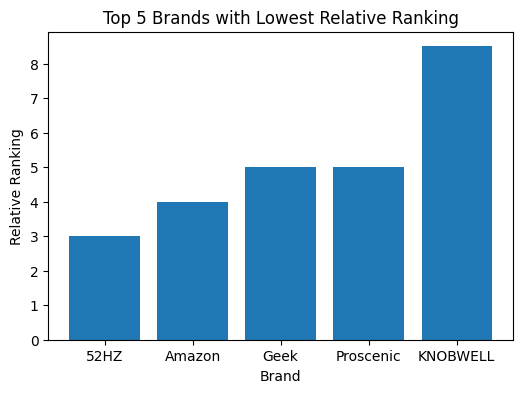

In [28]:
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(6, 4))

# Plotting the data
plt.bar(top_5_brands['Brand Name'], top_5_brands['Relative_Ranking'])

# Adding labels & Title
plt.xlabel('Brand')
plt.ylabel('Relative Ranking')
plt.title('Top 5 Brands with Lowest Relative Ranking')

# Display the plot
plt.show()

#####2. Visualise the Price Distribution of SKUs

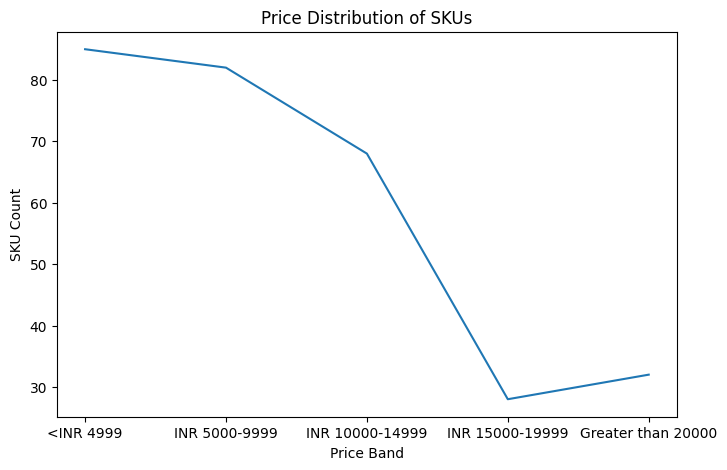

In [29]:
import matplotlib.pyplot as plt

#converting the result_e to dataframe to make sure that the graph has been plotted
df = pd.DataFrame(result_e, columns=['Price_Band', 'SKU_Count'])

# Set the figure size
plt.figure(figsize=(8, 5))

# Plotting the data
plt.plot(df['Price_Band'], df['SKU_Count'])

# Adding labels and title
plt.xlabel('Price Band')
plt.ylabel('SKU Count')
plt.title('Price Distribution of SKUs')

# Display the plot
plt.show()
